In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
cd ..

/Users/yeehonglow/Documents/Imperial/Machine-Learning-to-Track-Cloud-Computing


In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randrange
import progressbar
from sklearn.cluster import AgglomerativeClustering as agc
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [9]:
SELECT_NUMBER = 1000

random.seed(1)
x_axis = np.arange(0, 29-1/288, 1/288).tolist()
np_cpu = np.load("dataset//google-cpu-full.npy")

# full_cpu is a list of pandas series of the cpu utilisation of all machines
# just a lazy way of converting nd-arrays to pd-series
full_cpu = []
for x in range (0,len(np_cpu)):
    full_cpu.append(pd.Series(np_cpu[x], index = x_axis))  
    
random_samples = [34, 150, 352, 365, 416, 464, 475, 501, 565, 1033, 1416, 1537, 1638, 1674, 1768, 1931, 1980, 2201, 
                  2682, 2834, 3045, 3110, 3439, 3548, 3584, 3632, 3748, 3782, 3818, 3977, 4179, 4363, 4655, 4747, 
                  4856, 4970, 5200, 5450, 5663, 6014, 6070, 6139, 6219, 6245, 6386, 6443, 6444, 6623, 6788, 6818, 
                  6915, 7090, 7174, 7191, 7297, 7364, 7530, 7737, 7868, 7993, 8023, 8117, 8123, 8181, 8205, 8278, 
                  8318, 8330, 8535, 8644, 8870, 8991, 9058, 9116, 9325, 9626, 9650, 9685, 9952, 10311, 10523, 10642,
                  10675, 10875, 10891, 10982, 11050, 11089, 11247, 11400, 11518, 11652, 11820, 11821, 11856, 11892,
                  12094, 12175, 12185, 12467]  

df_cpu = pd.DataFrame(np_cpu).transpose()
df_cpu = df_cpu[random_samples].drop(df_cpu.tail(33).index)

In [10]:
def arima_predictions(timeseries, input_order):
    train_size = int(len(timeseries)*0.99)
    X = timeseries.values
    train, test = X[0:train_size], X[train_size:]
    history = list(train)
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order = input_order)
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)

    return mean_squared_error(test, predictions)

def order_score(cpu_data, input_order):
    # Returns mean squared error accross all timeseries and also across time
    # This is used to score the model order
    score = 0
    
    with progressbar.ProgressBar(max_value = len(cpu_data.columns)) as bar:
        for index,timeseries in enumerate(cpu_data):
            bar.update(index)    
            score += arima_predictions(cpu_data[timeseries], input_order)
            
    return score/len(cpu_data.columns)

In [61]:
score_3_0_0 = order_score(df_cpu, (3,0,0))

100% (100 of 100) |######################| Elapsed Time: 0:32:59 Time:  0:32:59


In [66]:
score_3_1_0 = order_score(df_cpu, (3,1,0))

100% (100 of 100) |######################| Elapsed Time: 0:29:34 Time:  0:29:34


In [71]:
score_3_0_3 = order_score(df_cpu, (3,0,3))

100% (100 of 100) |#####################| Elapsed Time: 11:07:44 Time: 11:07:44


In [72]:
score_3_1_3 = order_score(df_cpu, (3,1,3))

100% (100 of 100) |#####################| Elapsed Time: 18:38:35 Time: 18:38:35


In [8]:
score_3_0_1 = order_score(df_cpu, (3,0,1))
print("Score (3,0,1): ", score_3_0_1)

 12% (12 of 100) |##                     | Elapsed Time: 0:29:04 ETA:   3:37:38/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: Conver

Score (3,0,1):  0.23810441910062707


In [9]:
score_5_0_0 = order_score(df_cpu, (5,0,0))
print("Score (5,0,0): ", score_5_0_0)

 38% (38 of 100) |########               | Elapsed Time: 0:29:24 ETA:   1:04:36/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
100% (100 of 100) |######################| Elapsed Time: 1:13:34 Time:  1:13:34


Score (5,0,0):  0.23747909233740852


In [65]:
score_3_0_0 = score_2_0_0
score_3_0_0

0.18366993400504858

In [68]:
score_3_1_0

0.18903751491221565

In [73]:
score_3_0_3

0.17595132138567696

In [74]:
score_3_1_3

0.17638068478493613

In [ ]:
score_5_0_0 = order_score(df_cpu, (5,0,0))
score_5_0_0

In [18]:
score_2_0_0 = order_score(df_cpu, (2,0,0))

  1% (1 of 100) |                        | Elapsed Time: 0:00:14 ETA:   0:23:46/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 12% (12 of 100) |##                     | Elapsed Time: 0:02:31 ETA:   0:20:28/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 14% (14 of 100) |###                    | Elapsed Time: 0:02:57 ETA:   0:24:08/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 27% (27 of 100) |######                 | Elapsed Time: 0:05:44 ETA:   0:18:46/Users

In [19]:
score_4_0_0 = order_score(df_cpu, (4,0,0))

 45% (45 of 100) |##########             | Elapsed Time: 0:21:55 ETA:   0:21:14/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
100% (100 of 100) |######################| Elapsed Time: 0:49:36 Time:  0:49:36


In [1]:
recorded_2_0_0 = 0.23914244220209996
recorded_3_0_0 = 0.18366993400504858
recorded_4_0_0 = 0.2361448052905791
recorded_5_0_0 = 0.23747909233740852
recorded_3_1_0 = 0.18903751491221565
recorded_3_1_3 = 0.17638068478493613
recorded_3_0_1 = 0.23810441910062707
recorded_3_0_3 = 0.17595132138567696

In [13]:
time_2_0_0 = (12 + 31/60)*60
time_3_0_0 = (32 + 59/60)*60
time_4_0_0 = (49 + 36/60)*60
time_5_0_0 = (60 + 13 + 34/60)*60
time_3_1_0 = (29 + 34/60)*60
time_3_1_3 = (18*60 + 38 + 35/60)*60
time_3_0_1 = (4*60 + 24 + 30/60)*60
time_3_0_3 = (11*60 + 7 + 44/60)*60

In [14]:
number_of_predictions = (len(df_cpu) - int(len(df_cpu)*0.99))*1000

rate_2_0_0 = time_2_0_0 / number_of_predictions
rate_3_0_0 = time_3_0_0 / number_of_predictions
rate_4_0_0 = time_4_0_0 / number_of_predictions
rate_5_0_0 = time_5_0_0 / number_of_predictions
rate_3_1_0 = time_3_1_0 / number_of_predictions
rate_3_1_3 = time_3_1_3 / number_of_predictions
rate_3_0_1 = time_3_0_1 / number_of_predictions
rate_3_0_3 = time_3_0_3 / number_of_predictions

In [15]:
ls_recorded = [recorded_2_0_0, 
               recorded_3_0_0, 
               recorded_4_0_0, 
               recorded_5_0_0, 
               recorded_3_1_0, 
               recorded_3_1_3, 
               recorded_3_0_1, 
               recorded_3_0_3]

ls_rate = [rate_2_0_0, 
           rate_3_0_0, 
           rate_4_0_0, 
           rate_5_0_0, 
           rate_3_1_0, 
           rate_3_1_3, 
           rate_3_0_1, 
           rate_3_0_3]

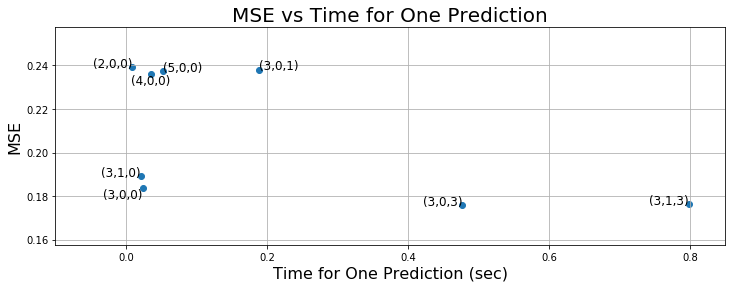

In [18]:
plt.figure(figsize = (12,4))
plt.scatter(ls_rate,ls_recorded)
plt.grid()
plt.title("MSE vs Time for One Prediction", fontsize = 20)
plt.xlabel("Time for One Prediction (sec)", fontsize = 16)
plt.ylabel("MSE", fontsize = 16)
plt.xlim(-0.1,0.85)

plt.text(rate_2_0_0, recorded_2_0_0,'(2,0,0)', horizontalalignment='right', fontsize = 12)
plt.text(rate_3_0_0, recorded_3_0_0,'(3,0,0)', horizontalalignment='right', verticalalignment='top', fontsize = 12)
plt.text(rate_4_0_0, recorded_4_0_0,'(4,0,0)', verticalalignment='top', horizontalalignment = "center", fontsize = 12)
plt.text(rate_5_0_0, recorded_5_0_0,'(5,0,0)', horizontalalignment='left', fontsize = 12)
plt.text(rate_3_1_0, recorded_3_1_0,'(3,1,0)', horizontalalignment='right', fontsize = 12)
plt.text(rate_3_1_3, recorded_3_1_3,'(3,1,3)', horizontalalignment='right', fontsize = 12)
plt.text(rate_3_0_1, recorded_3_0_1,'(3,0,1)', horizontalalignment='left', fontsize = 12)
plt.text(rate_3_0_3, recorded_3_0_3,'(3,0,3)', horizontalalignment='right', fontsize = 12)

plt.savefig("figures/implementation/arima_order")